In [1]:
%load_ext autoreload
%autoreload 2

In [94]:
from __init__ import *
import numpy as np
from svg_reader import SVGReader
from helpers.helpers import filter_none
from placement.attract import *
from visuals.plotter import plot_general
from copy import deepcopy
import networkx as nx
from itertools import pairwise, accumulate, product
from functools import reduce
from operator import add
from helpers.helpers import sort_and_group_objects
from domains.domain import Domain
from placement.neighbors import *
from placement.cardinal import *
from identify.id_problems import report_problems
from actions.selection import *
from helpers.layout import Layout
import plotly.io as pio
from icecream import ic
from placement.draw_cardinal import draw_cardinal_dags
import matplotlib.pyplot as plt


In [67]:
from pathlib import Path
svgs = Path.cwd().parent.parent / "svg_imports"
figures = Path.cwd().parent.parent / "figures"

In [70]:
def save_plotly_figure(fig, loc, name):
    fig.update_layout( template='simple_white')
    save_loc = figures / loc / f"{name}.png"
    fig.write_image(save_loc , scale=3)

    return save_loc
    


In [72]:
case  = svgs / f"red_b1.svg"
save_folder = "red_b1_process"
sv = SVGReader(case)
sv.run()
domains = sv.domains
pos = create_pos(domains)


In [5]:
[(i.name, i.area) for i in sv.init_domains.values()]

[('bed_n', Decimal('7.7056')),
 ('living', Decimal('25.7964')),
 ('closet_n', Decimal('1.2412')),
 ('bath', Decimal('2.5894')),
 ('closet_s', Decimal('1.2412')),
 ('bed', Decimal('7.6454')),
 ('transit', Decimal('2.3496'))]

In [73]:
fig = plot_general(domains)
save_plotly_figure(fig, save_folder, "just_svg")

PosixPath('/Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/svg2plan/figures/red_b1_process/just_svg.png')

In [33]:
ad_layout = adjust_domains(domains)
a_domains, [Gx, Gy] = ad_layout
Gxc, Gyc = create_cardinal_dags(ad_layout)


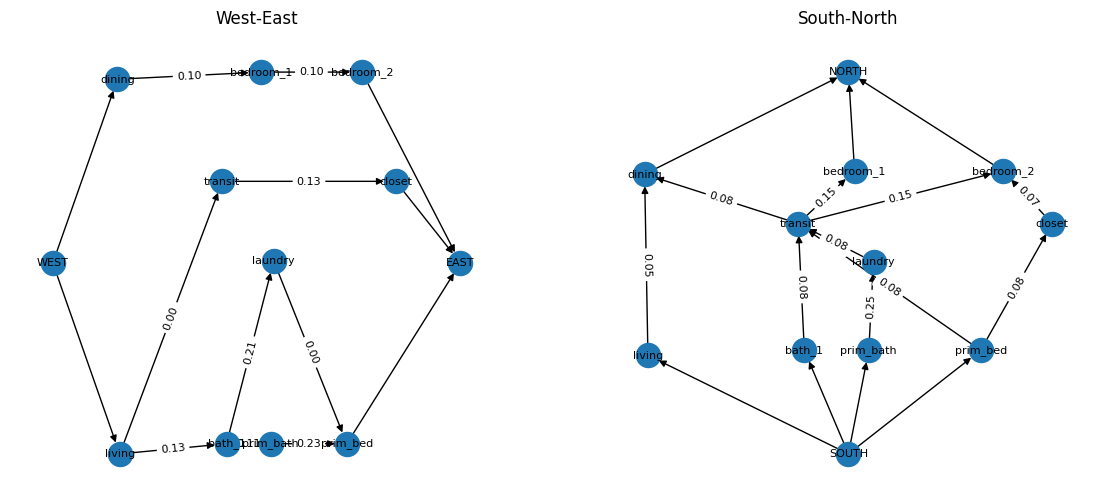

In [109]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
draw_cardinal_dags(Gxc, domains, ax[0])
draw_cardinal_dags(Gyc, domains, ax[1])
ax[0].set_title("West-East")
ax[1].set_title("South-North")
fig.savefig(figures / save_folder / f"adj_graphs.png", dpi=800)



In [74]:
fig = plot_general(ad_layout.domains)
save_plotly_figure(fig, save_folder, "close_svg")

PosixPath('/Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/svg2plan/figures/red_b1_process/close_svg.png')

In [37]:
fl = FixLayout(ad_layout)
fl.run_to_completion()

initializing.. 0
next best layout laundry-STRETCH-for-HOLE near ['laundry', 'transit']3-PS:1.14-S:2.07
running again 1
next best layout prim_bath-STRETCH-for-HOLE near ['prim_bath', 'prim_bed']2-PS:0.64-S:1.32
running again 2
next best layout bedroom_2-PULL-for-HOLE near ['transit', 'bedroom_2']2-PS:0.54-S:1.27
running again 3
next best layout closet-SQUEEZE-for-OVERLAP near ['closet', 'bedroom_2']1-PS:0.38-S:0.69
running again 4
next best layout dining-PULL-for-HOLE near ['transit', 'dining']1-PS:0.44-S:0.72
running again 5
next best layout living-PUSH-for-OVERLAP near ['living', 'dining']0-PS:0.22-S:0.11
No more results!
Found best layout: living-PUSH-for-OVERLAP near ['living', 'dining']0-PS:0.22-S:0.11


In [29]:
fl.bl.short_message()

"bed_n-PULL-for-HOLE near ['bed_n', 'living']0-PS:0.06-S:0.03"

In [ ]:
# f = fl.plot_all(xrange=[-0.5, 10.5], yrange=[-0.5, 7], )
# save_location=figures / save_folder 


n_rows 3, n_sols: 6
len sols = 6+1. Len indices = 9


In [107]:
fig = plot_general(fl.bl.layout.domains)
save_plotly_figure(fig, save_folder, "fixed_svg")

PosixPath('/Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/svg2plan/figures/red_b1_process/fixed_svg.png')

In [ ]:
from actions.leveler import level_sides


new_doms = level_sides(fl.bl.layout)

In [108]:
fig = plot_general(new_doms)
save_plotly_figure(fig, save_folder, "leveled_svg")

PosixPath('/Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/svg2plan/figures/red_b1_process/leveled_svg.png')